In [4]:
import numpy as np
import pandas as pd

In [5]:
dbDir = '../../DB_Files'

In [6]:
dbName = 'baseline_v3.3_10yrs.npy'

In [7]:
data = pd.DataFrame(np.load('{}/{}'.format(dbDir,dbName)))

In [8]:
len(data)

2131089

In [9]:
idx = data['note'] == 'DD:COSMOS'
sel = data[idx]

In [56]:
def coadd(grp):
    
    col = 'fiveSigmaDepth'
    nvisits = len(grp)
    m5_mean = grp[col].mean()
    m5_std = grp[col].std()
    if nvisits <= 2:
        return pd.DataFrame()
    
    m5_coadd_visit = 1.25*np.log10(nvisits)+m5_mean
    
    m5_coadd = 1.25*np.log10(np.sum(10**(0.8*grp[col])))
    
    return pd.DataFrame({'m5_coadd':[m5_coadd],'m5_coadd_visit':[m5_coadd_visit],'nvisits':[nvisits],'m5_mean':[m5_mean],'m5_std':[m5_std]})
    
    
    

In [57]:
tt = sel.groupby(['night','band']).apply(lambda x: coadd(x)).reset_index()

In [58]:
tt['diff'] = tt['m5_coadd']-tt['m5_coadd_visit']

In [59]:
tt

,night,band,level_2,m5_coadd,m5_coadd_visit,nvisits,m5_mean,m5_std,diff
0,3,g,0,25.234560,25.233912,10.0,23.983912,0.027630,0.000648
1,3,i,0,25.304730,25.302662,20.0,23.676375,0.048702,0.002067
2,3,r,0,25.529076,25.527594,20.0,23.901307,0.040934,0.001482
3,3,y,0,23.816966,23.814829,18.0,22.245738,0.049607,0.002137
4,3,z,0,24.967500,24.966743,24.0,23.241479,0.029392,0.000757
...,...,...,...,...,...,...,...,...,...
2196,3649,g,0,25.881718,25.881090,10.0,24.631090,0.027409,0.000628
2197,3649,i,0,25.478329,25.476223,20.0,23.849935,0.049283,0.002106
2198,3649,r,0,25.900588,25.896614,20.0,24.270327,0.067083,0.003973
2199,3649,y,0,24.040593,24.034265,18.0,22.465174,0.086850,0.006328


In [60]:
import matplotlib.pyplot as plt

In [80]:
def plot_diff(data, band,varx='m5_std',vary='diff',fig=None, ax=None):
    
    if fig is None:
        fig, ax = plt.subplots()
        
    print(band)
    idx = data['band'].isin([*band])
    ax.plot(selb[varx],selb[vary],'k.',label=band)
    y_params = np.polyfit(selb[varx], selb[vary], 2)  #fit 
    print(band,y_params)
    min_std = selb[varx].min()
    max_std = selb[varx].max()
    m5 = np.arange(min_std,max_std,0.01)
    vv = y_params[0]*m5**2+y_params[1]*m5+y_params[2]
    ax.plot(m5,vv,color='r')
    ax.legend()

  band      diff
0    g  0.008902
1    i  0.007270
2    r  0.008240
3    u  0.008155
4    y  0.007521
5    z  0.007818
ugrizy
ugrizy [ 0.74036216  0.02419808 -0.00086993]


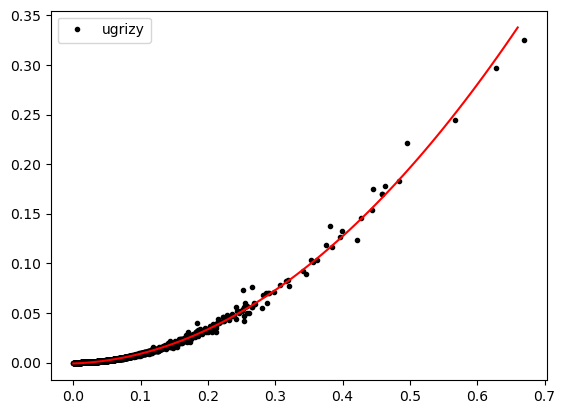

In [83]:
tb = tt.groupby(['band'])['diff'].mean().reset_index()
print(tb)
plot_diff(tt,band='ugrizy')